In [4]:
print("Hello, Fake News Detection Project!")



Hello, Fake News Detection Project!


In [2]:
import pandas as pd
print(pd.__version__)


2.3.2


In [12]:
import pandas as pd

# Try latin1 encoding
df = pd.read_csv("../data/raw/Data.csv", encoding="latin1")

print("🔹 First 5 rows:")
print(df.head())

print("\n🔹 Dataset Shape:", df.shape)
print("\n🔹 Columns:", df.columns.tolist())
print(df.columns)


🔹 First 5 rows:
   id                                          Statement  \
0   2  WHO praises India's Aarogya Setu app, says it ...   
1   3  In Delhi, Deputy US Secretary of State Stephen...   
2   4  LAC tensions: China's strategy behind delibera...   
3   5  India has signed 250 documents on Space cooper...   
4   6  Tamil Nadu chief minister's mother passes away...   

                                               Image       Web  Category  \
0  https://cdn.dnaindia.com/sites/default/files/s...  DNAINDIA  COVID-19   
1  https://cdn.dnaindia.com/sites/default/files/s...  DNAINDIA  VIOLENCE   
2  https://cdn.dnaindia.com/sites/default/files/s...  DNAINDIA    TERROR   
3  https://cdn.dnaindia.com/sites/default/files/s...  DNAINDIA  COVID-19   
4  https://cdn.dnaindia.com/sites/default/files/s...  DNAINDIA  ELECTION   

     Date Label  
0  Oct-20  TRUE  
1  Oct-20  TRUE  
2  Oct-20  TRUE  
3  Oct-20  TRUE  
4  Oct-20  TRUE  

🔹 Dataset Shape: (56714, 7)

🔹 Columns: ['id', 'Statement

In [13]:
# Check label distribution
print("🔹 Label Counts:")
print(df['Label'].value_counts())

# Example fake vs real
print("\n🔹 Sample Fake News:")
print(df[df['Label'] == 'FAKE']['Statement'].head(3))

print("\n🔹 Sample Real News:")
print(df[df['Label'] == 'REAL']['Statement'].head(3))


🔹 Label Counts:
Label
TRUE    37800
Fake    18914
Name: count, dtype: int64

🔹 Sample Fake News:
Series([], Name: Statement, dtype: object)

🔹 Sample Real News:
Series([], Name: Statement, dtype: object)


In [14]:
# Normalize labels (make them consistent: FAKE / REAL)
df['Label'] = df['Label'].str.upper()

print("🔹 Normalized Label Counts:")
print(df['Label'].value_counts())

# Show some examples
print("\n🔹 Sample Fake News:")
print(df[df['Label'] == 'FAKE']['Statement'].head(3))

print("\n🔹 Sample Real News:")
print(df[df['Label'] == 'TRUE']['Statement'].head(3))


🔹 Normalized Label Counts:
Label
TRUE    37800
FAKE    18914
Name: count, dtype: int64

🔹 Sample Fake News:
37800     Fact Check: 1938 video of BKS Iyengar shared ...
37801     Fact Check: Conspiracy theory claims Sushant ...
37802     Fact Check: Gujarats Rani ki Vav shared as p...
Name: Statement, dtype: object

🔹 Sample Real News:
0    WHO praises India's Aarogya Setu app, says it ...
1    In Delhi, Deputy US Secretary of State Stephen...
2    LAC tensions: China's strategy behind delibera...
Name: Statement, dtype: object


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Features and Labels
X = df['Statement']   # text data
y = df['Label']       # FAKE / TRUE

# Step 2: Split into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 4: Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test_tfidf)

# Step 6: Evaluation
print("🔹 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

🔹 Classification Report:
              precision    recall  f1-score   support

        FAKE       0.98      0.85      0.91      3783
        TRUE       0.93      0.99      0.96      7560

    accuracy                           0.95     11343
   macro avg       0.96      0.92      0.94     11343
weighted avg       0.95      0.95      0.95     11343


🔹 Confusion Matrix:
[[3230  553]
 [  51 7509]]


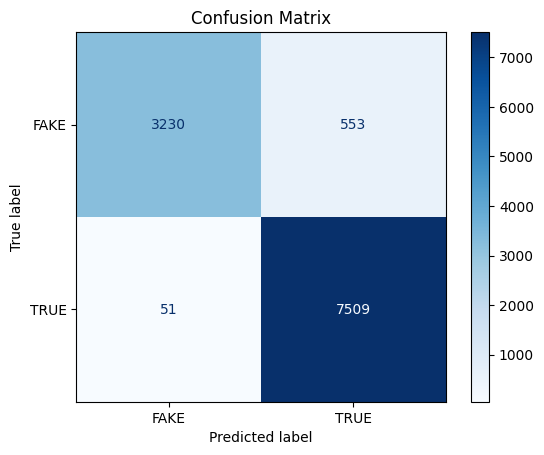

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()



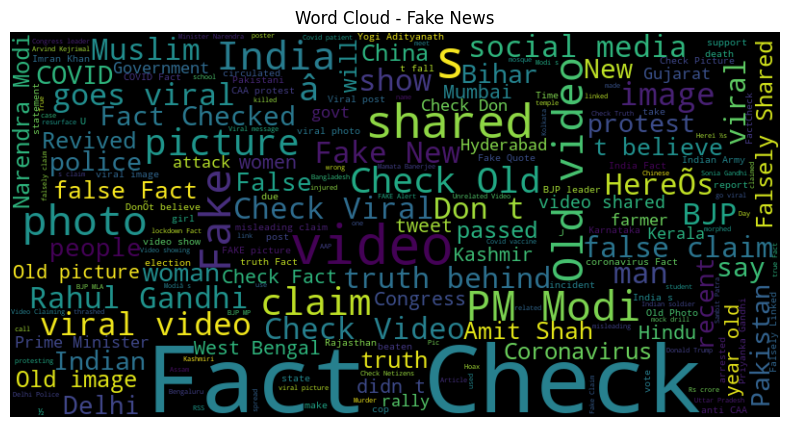

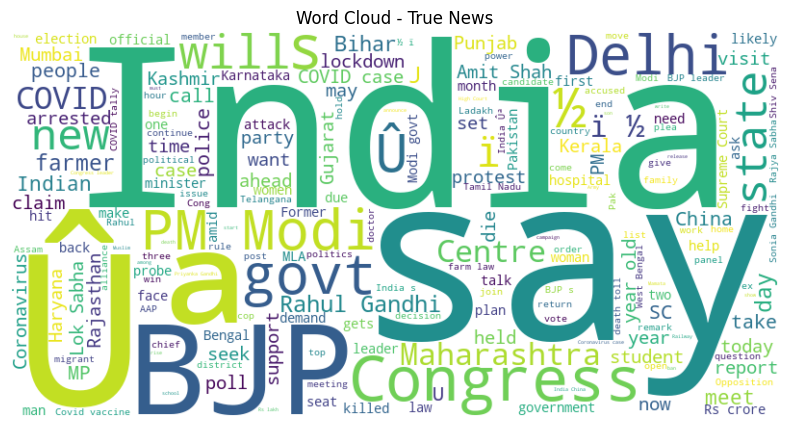

In [20]:
from wordcloud import WordCloud

# Fake News WordCloud
fake_text = " ".join(df[df['Label'] == 'FAKE']['Statement'].astype(str))
fake_wc = WordCloud(width=800, height=400, background_color="black").generate(fake_text)

plt.figure(figsize=(10,5))
plt.imshow(fake_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Fake News")
plt.show()

# True News WordCloud
true_text = " ".join(df[df['Label'] == 'TRUE']['Statement'].astype(str))
true_wc = WordCloud(width=800, height=400, background_color="white").generate(true_text)

plt.figure(figsize=(10,5))
plt.imshow(true_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - True News")
plt.show()



🔹 Classification Report (Balanced):
              precision    recall  f1-score   support

        FAKE       0.97      0.89      0.92      3783
        TRUE       0.95      0.99      0.96      7560

    accuracy                           0.95     11343
   macro avg       0.96      0.94      0.94     11343
weighted avg       0.95      0.95      0.95     11343



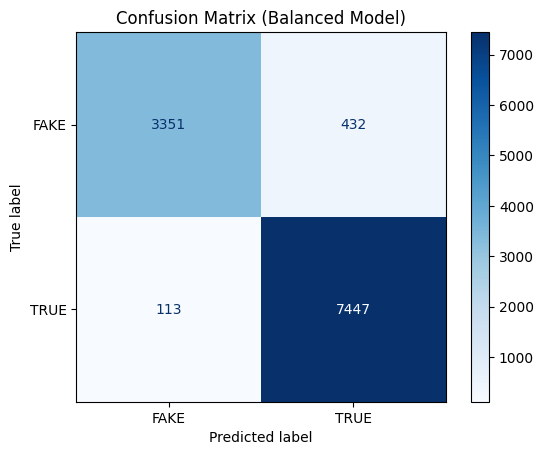

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Features and labels
X = df['Statement']
y = df['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression with class balancing
model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("🔹 Classification Report (Balanced):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (Balanced Model)")
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_13048\1485377405.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Label", data=df, palette="Set2")


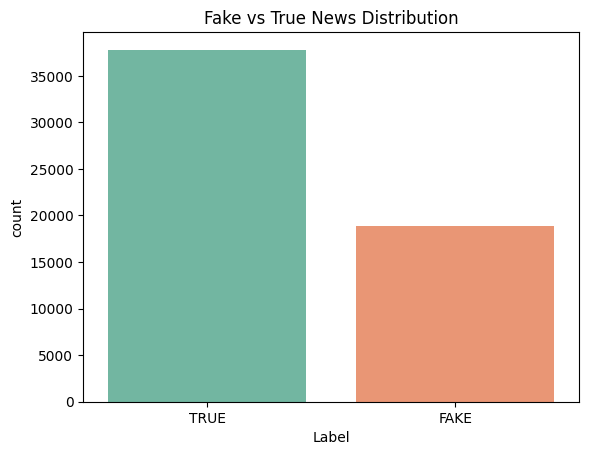

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Label", data=df, palette="Set2")
plt.title("Fake vs True News Distribution")
plt.show()


In [26]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Date'])

# Group by month and Label
trend = df.groupby([df['Date'].dt.to_period('M'), 'Label']).size().unstack()

# Convert PeriodIndex → Timestamp for plotting
trend.index = trend.index.to_timestamp()

# Plot trend
trend.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Fake vs True News Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Count of News Articles")
plt.grid(True)
plt.show()


TypeError: no numeric data to plot

In [24]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred_nb = nb_model.predict(X_test_tfidf)

print("Naïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naïve Bayes Classification Report:
              precision    recall  f1-score   support

        FAKE       0.96      0.87      0.91      3783
        TRUE       0.94      0.98      0.96      7560

    accuracy                           0.94     11343
   macro avg       0.95      0.92      0.94     11343
weighted avg       0.95      0.94      0.94     11343

